Consider the density $f(x)$ $=$ $\frac{1 - \cos(x - \theta)}{2\pi}$ on  $0 \le x \le 2\pi$,
where $-\pi \le \theta \le \pi$

In [1]:
x <- c(3.91, 4.85, 2.28, 4.06, 3.70,
       4.04, 5.46, 3.53, 2.28, 1.96,
       2.53, 3.88, 2.22, 3.47, 4.82,
       2.46, 2.99, 2.54, 0.52, 2.50)

In [2]:
density_func <- function(x, theta) {
    (1 - cos(x - theta)) / (2*pi)
}

In [3]:
loglikelihood_func <- function(x, theta) {
    total <- 0.
    for (x_i in x) {
        total <- total + log(density_func(x_i, theta))
    }
    total
}

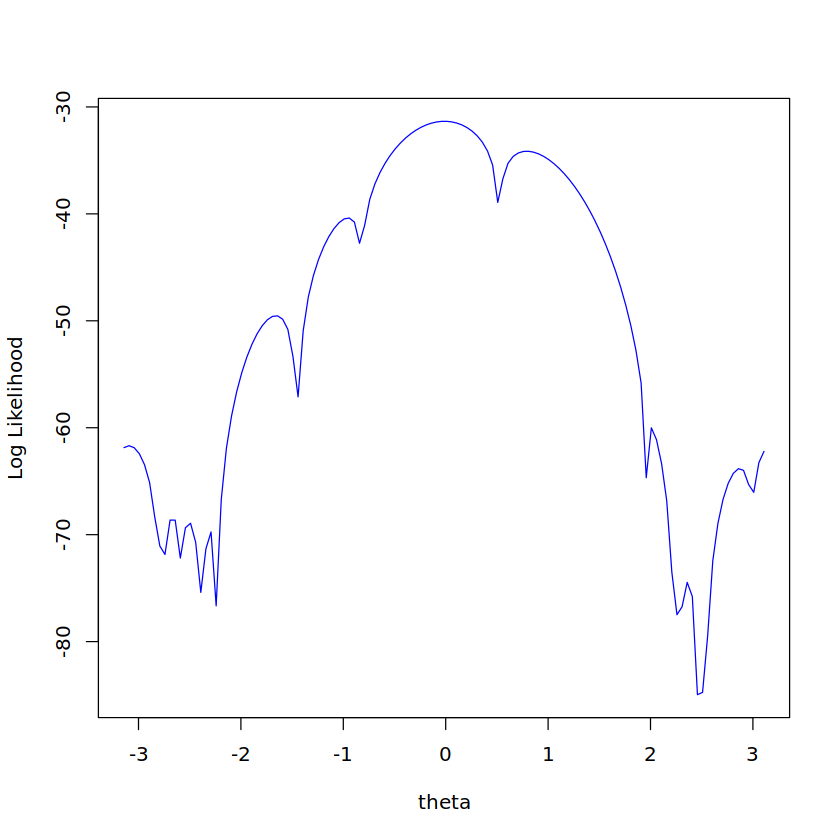

In [4]:
theta_seq <- seq(-pi, pi, by=0.05)

plot(
    theta_seq,
    loglikelihood_func(x, theta_seq),
    type = "l",
    col = "blue",
    xlab = 'theta',
    ylab = 'Log Likelihood'
)

In [5]:
plot_optimal_point <- function(optimal_point, plot_name) {
    plot(
        theta_seq,
        loglikelihood_func(x, theta_seq),
        type = "l",
        col = "blue",
        xlab = 'theta',
        ylab = 'Log Likelihood'
    )
    abline(v=optimal_point, col="red")
    title(main=paste(strwrap(plot_name, width=60), collapse="\n"))
}

### The method-of-moments estimator of $\theta$

**The MoM estimator of $\theta$:**
- We have: $\mathbb{E}[X]$ $=$ $\pi$ $+$ $\sin(\theta)$ $=$ $\frac{1}{n}$$\sum_{i=1}^{n}x_{i}$
- Solve the equation, we have: $\theta$ $=$ $\arcsin(\frac{1}{n}\sum_{i=1}^{n}x_{i} - \pi)$

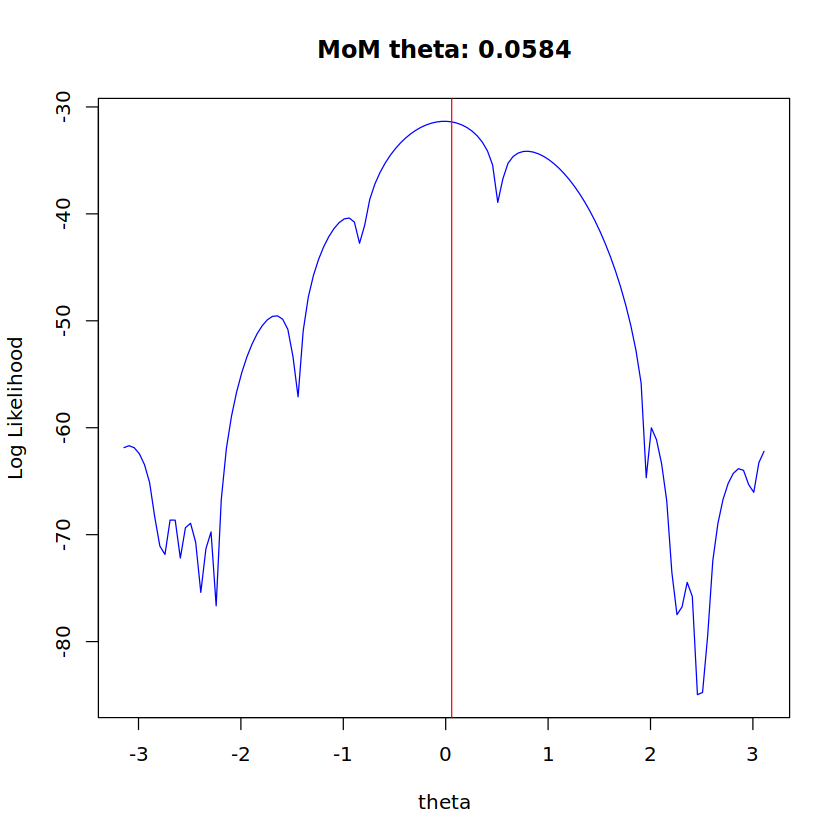

In [6]:
x_mean <- sum(x) / length(x)

theta_mom <- asin(x_mean - pi)
plot_name <- sprintf("MoM theta: %.4f", theta_mom)
plot_optimal_point(theta_mom, plot_name)

###  MLE for $\theta$ using Newton-Raphson method

In [7]:
diff <- function(x, theta, step=1e-6) {
    f1 = loglikelihood_func(x, theta + step)
    f2 = loglikelihood_func(x, theta)

    return((f1 - f2)/step)
}

In [8]:
first_derivative <- function(x, theta) {
    total <- 0.
    for (x_i in x) {
        total <- total - sin(x_i - theta) / (1 - cos(x_i - theta))
    }

    total
}

In [9]:
## Gradient check

# x <- c(3.91, 4.85, 2.28, 4.06, 3.70,
#        4.04, 5.46, 3.53, 2.28, 1.96,
#        2.53, 3.88, 2.22, 3.47, 4.82,
#        2.46, 2.99, 2.54, 0.52, 2.50)
# theta <- -1.

# val1 <- diff(x, theta)
# val2 <- first_derivative(x, theta)

# (val1 - val2) / val1

In [10]:
second_derivative <- function(x, theta) {
    total <- 0.
    for (x_i in x) {
        total <- total - 1. / (1 - cos(x_i - theta))
    }

    total
}

In [11]:
newton_updating <- function(x, theta, epsilon=1e-6) {
    new_theta <- theta - first_derivative(x, theta) / (second_derivative(x, theta) + epsilon)

    new_theta
}

newton_optimizer <- function(x, max_iter, threshold, theta) {
    for (i in 1:max_iter) {
        iter <- i
        old_theta <- theta
        theta <- newton_updating(x, old_theta)
        
        if (abs(theta - old_theta) <= threshold) {
            return(list(iters=iter, theta=theta))
        }
    }

    return(list(iters=iter, theta=theta))
}

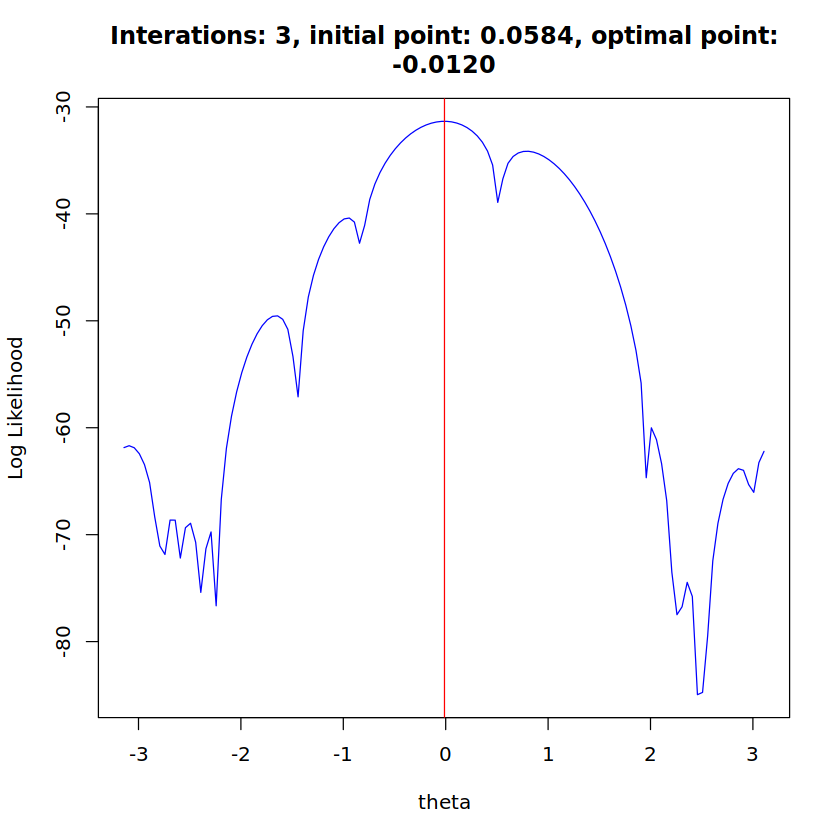

In [12]:
max_iter <- 50
threshold <- 1e-5
init_theta <- theta_mom

result <- newton_optimizer(x, max_iter, threshold, init_theta)
plot_name <- sprintf("Interations: %d, initial point: %.4f, optimal point: %.4f",
                     result$iters, init_theta, result$theta)
plot_optimal_point(result$theta, plot_name)

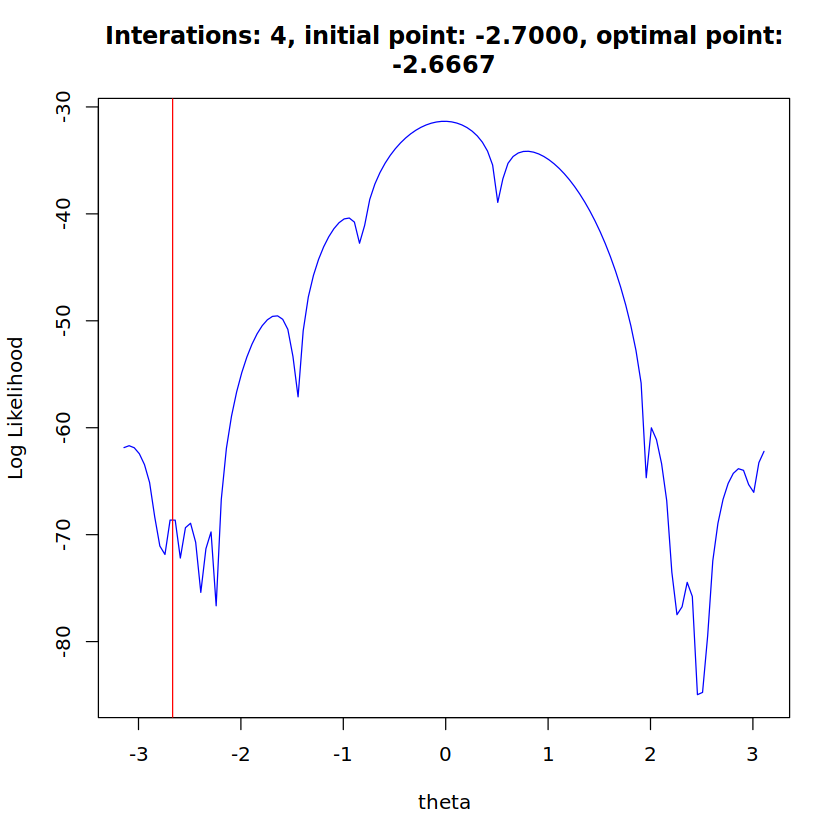

In [13]:
max_iter <- 50
threshold <- 1e-5
init_theta <- -2.7

result <- newton_optimizer(x, max_iter, threshold, init_theta)
plot_name <- sprintf("Interations: %d, initial point: %.4f, optimal point: %.4f",
                     result$iters, init_theta, result$theta)
plot_optimal_point(result$theta, plot_name)

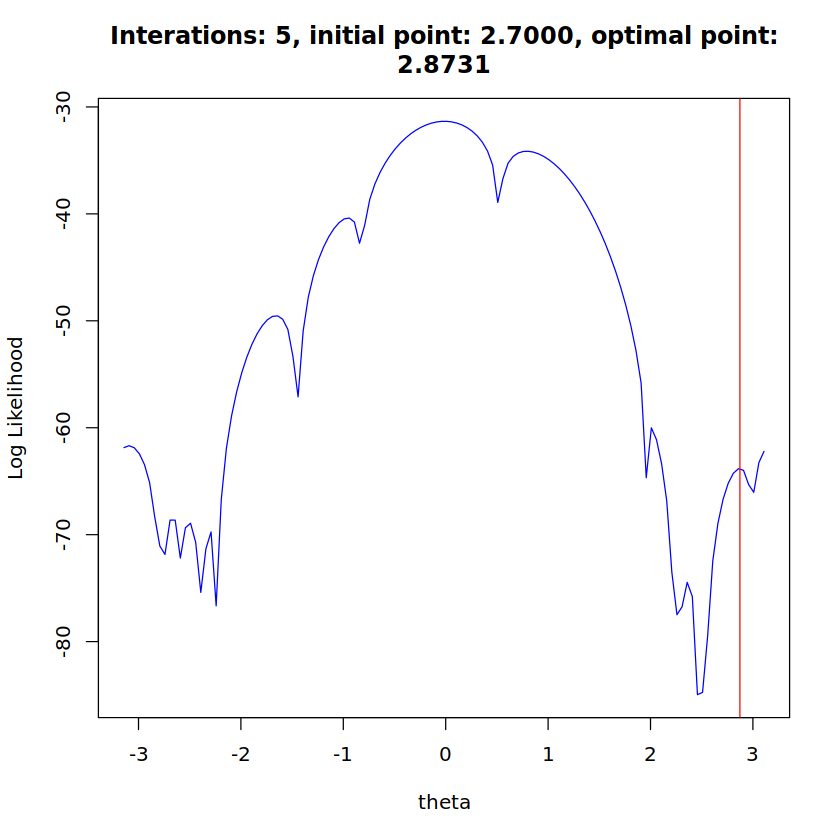

In [14]:
max_iter <- 50
threshold <- 1e-5
init_theta <- 2.7

result <- newton_optimizer(x, max_iter, threshold, init_theta)
plot_name <- sprintf("Interations: %d, initial point: %.4f, optimal point: %.4f",
                     result$iters, init_theta, result$theta)
plot_optimal_point(result$theta, plot_name)

 Dividing theta sequence into 200 equally spaced values 

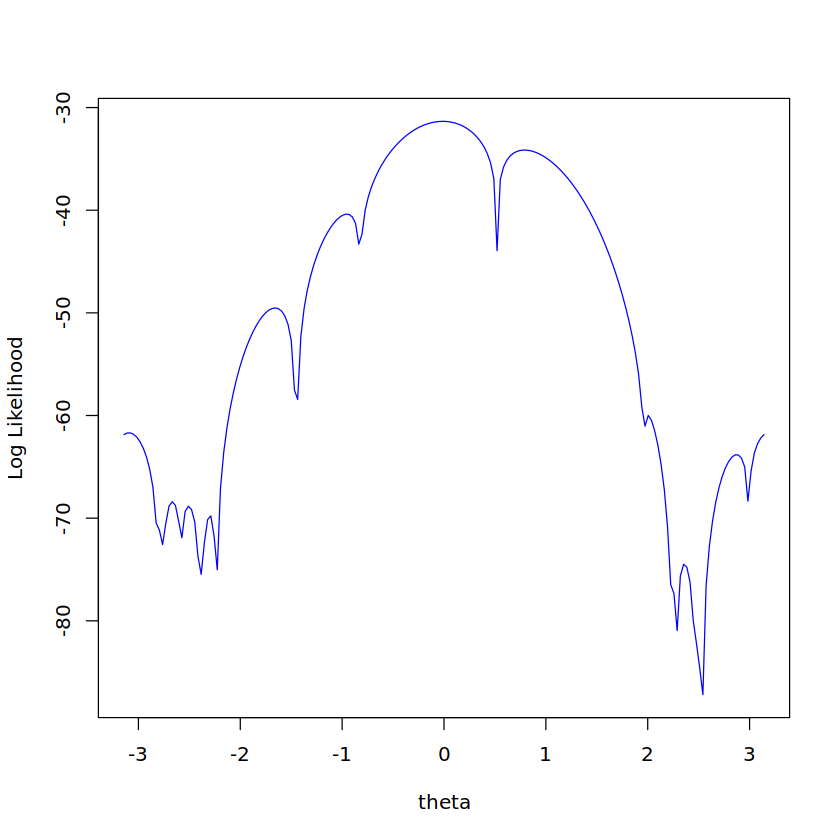

In [15]:
theta_seq <- seq(-pi, pi, by=2*pi/199)

plot(
    theta_seq,
    loglikelihood_func(x, theta_seq),
    type = "l",
    col = "blue",
    xlab = 'theta',
    ylab = 'Log Likelihood'
)

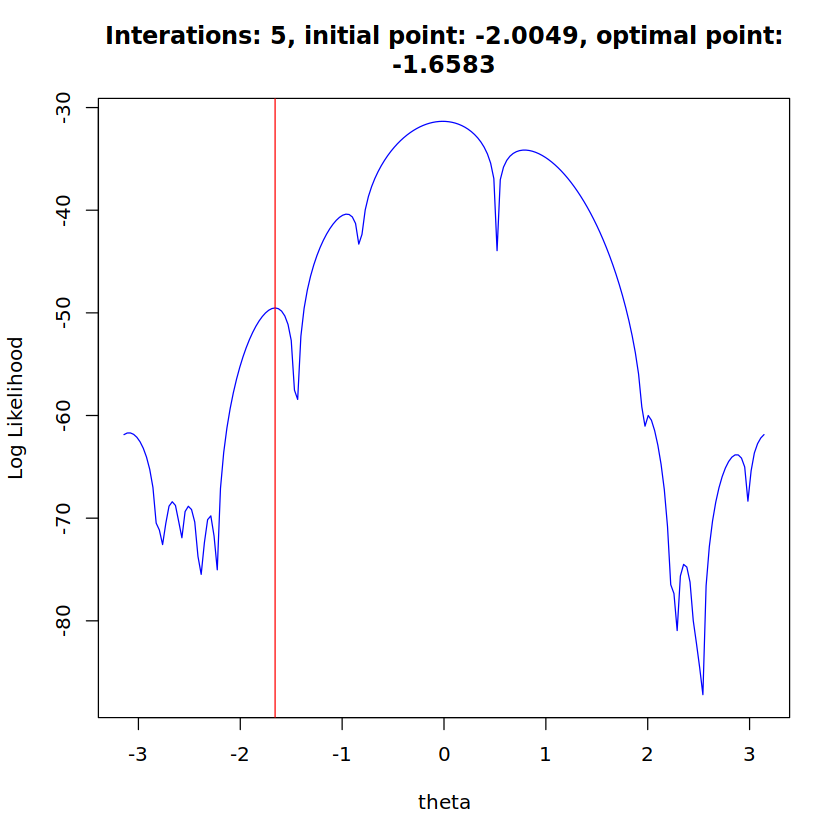

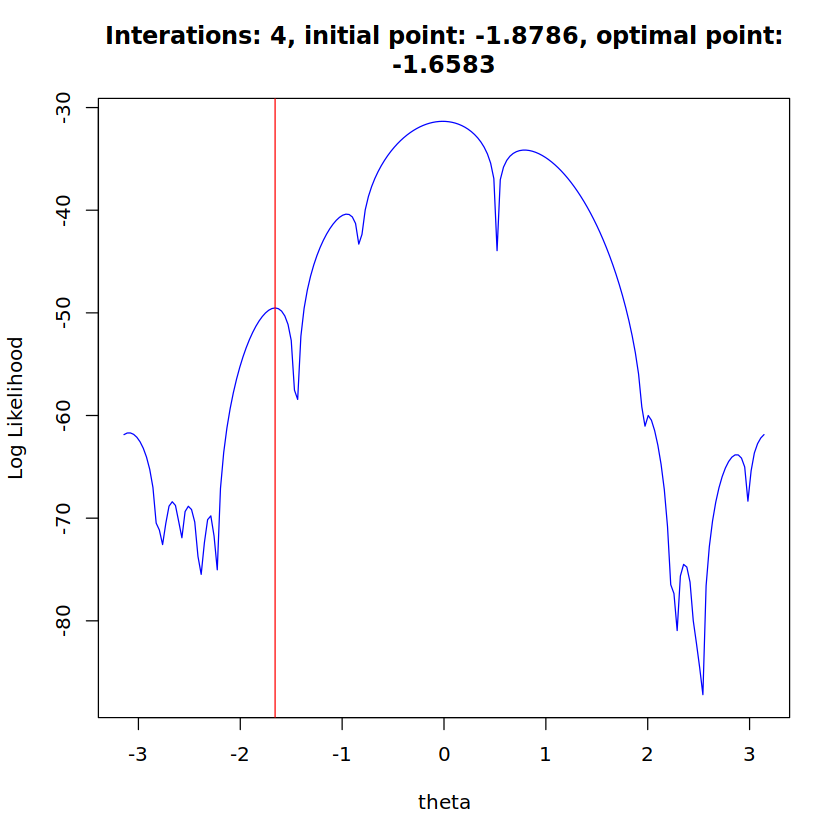

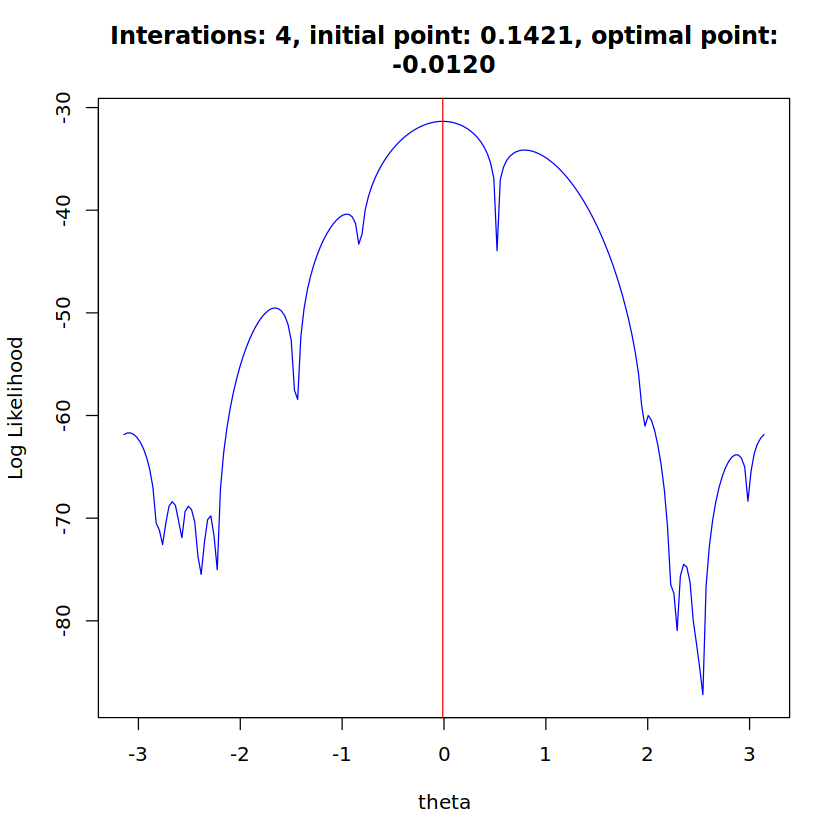

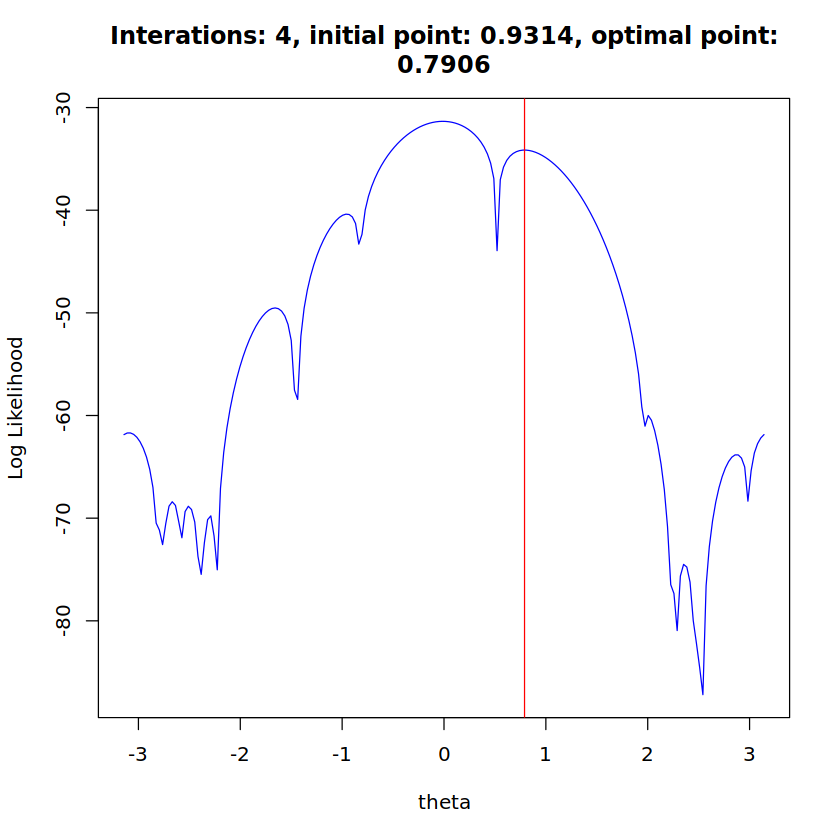

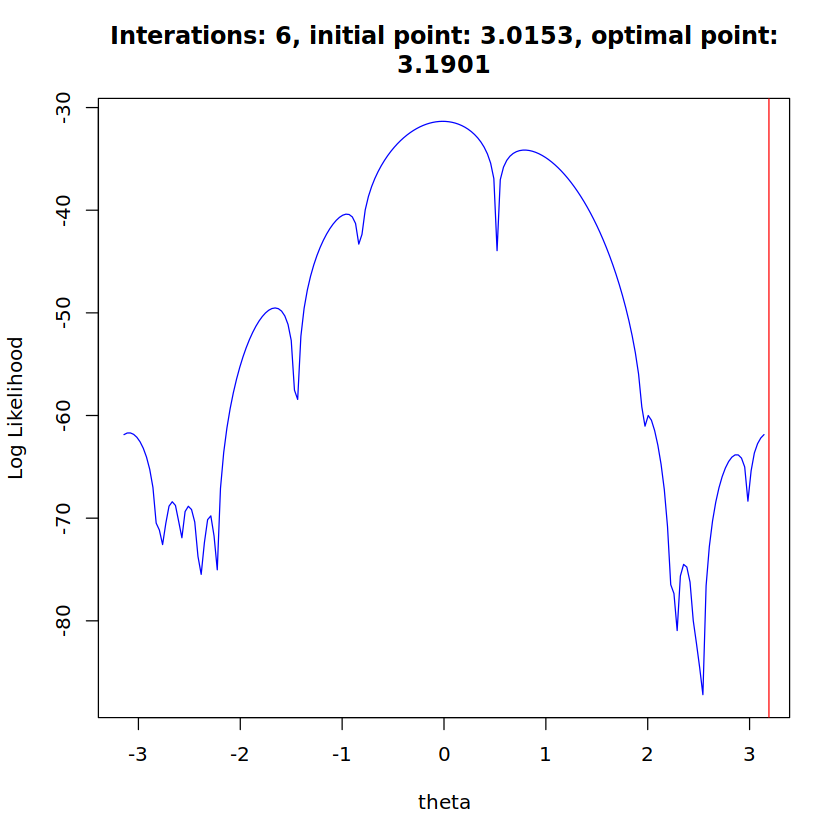

In [18]:
set.seed(42) # setting random seed
max_iter <- 50
threshold <- 1e-5
n_splits <- 5
subset_size <- as.integer(length(theta_seq) / n_splits)
start_index <- 1

for (i in 1:n_splits) {
    init_theta <- sample(
        theta_seq[start_index:(start_index + subset_size - 1)],
        size=1,replace=TRUE)
    start_index <- i*subset_size + 1

    result <- newton_optimizer(x, max_iter, threshold, init_theta)
    plot_name <- sprintf("Interations: %d, initial point: %.4f, optimal point: %.4f",
                         result$iters, init_theta, result$theta)
    plot_optimal_point(result$theta, plot_name)
    
}